In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn import linear_model


data = pd.read_csv('ev_data.csv')
(data[0:2])

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000


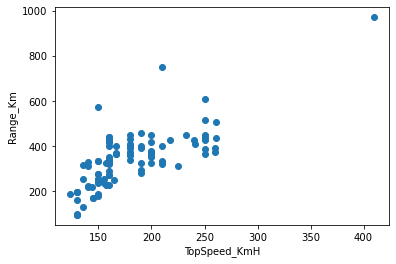

In [2]:
fig, ax = plt.subplots(1,1)

# Scatterplot 
ax.scatter(data['TopSpeed_KmH'], data['Range_Km'])

# Make some labels 
ax.set_xlabel('TopSpeed_KmH')
ax.set_ylabel('Range_Km')

plt.show()

In [3]:
data.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


In [4]:
data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [5]:
lm = linear_model.LinearRegression()

In [6]:
my_array = np.array(data.TopSpeed_KmH[: , np.newaxis])
lm.fit(my_array, data.Range_Km)

C:\Users\Zack\AppData\Local\Temp/ipykernel_5744/1834723711.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  my_array = np.array(data.TopSpeed_KmH[: , np.newaxis])


LinearRegression()

In [7]:
print('Our X intercept is', str(lm.intercept_)) # Y-intercept? or not important
print('Our coefficient is:', str(lm.coef_))

Our X intercept is -48.159881246031375
Our coefficient is: [2.15936868]


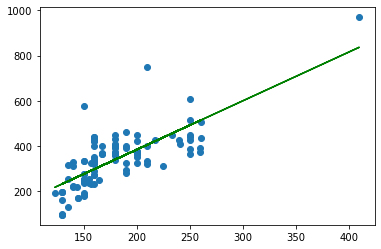

In [8]:
fig, ax = plt.subplots(1,1)
ax.scatter(data.TopSpeed_KmH, data.Range_Km)

# Plot the trend line like a normal line
ax.plot(
    data.TopSpeed_KmH, # This is our X
    lm.predict(my_array), # This is our Y being predicted
    color = 'green'
)
plt.show()

In [9]:
# TESTING THE MODEL - imports
import sklearn
from sklearn import linear_model, feature_selection, preprocessing
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm 
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [21]:
data = data[['TopSpeed_KmH','Range_Km']]
x = data.values.copy()
#x
#x[ :, 1] # Range
#x[ : , : -1 ] # TopKM

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x[ : , : -1 ], # TOPKM
    x[ :, 1],  # RANGE
    train_size = 0.80  # 80 / 20 split 
) 

In [23]:
result = sm.OLS(
    y_train,  # Training data
    add_constant(x_train),
).fit()
 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.82e-16
Time:                        13:06:06   Log-Likelihood:                -480.52
No. Observations:                  82   AIC:                             965.0
Df Residuals:                      80   BIC:                             969.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.3419     40.504     -1.342      0.184    -134.947      26.263
x1             2.2461      0.221     10.155      0.000       1.806       2.686
==============================================================================
Omnibus:                       22.051   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.556
Skew:                           1.025   Prob(JB):                     4.24e-09
Kurtosis:                       5.661   Cond. No.                         782.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y_pred = result.predict(add_constant(x_valid))
print ('Mean Square Error:', mse(y_pred, y_valid))

Mean Square Error: 6509.776342006687


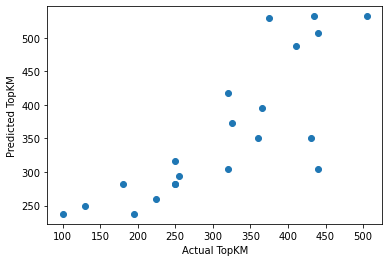

In [30]:
fig, ax = plt.subplots(1,1)
ax.scatter(y_valid, y_pred)


# Labels
ax.set_xlabel('Actual TopKM')
ax.set_ylabel('Predicted TopKM')
plt.show()